# Image testing for pre-processing

## Importing Modules

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import csv
import json
from os import listdir
from os.path import isfile, join
from tqdm import tqdm

from ManageLeafData import ManageLeafData as mld

## Loading image

In [3]:
# Global path must not be changed unless machine has been changed.
global_path = 'Collected Leaf data/Our Collection/Natural/'
# Local path can be changed anywhere, so before using it, specify the required path.
local_path = ''

In [3]:
img_1 = cv.imread(global_path + 'IMG_20230922_171310509.jpg')
cv.imshow('Raw Image', img_1)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
image_lst = ['IMG_20230922_171255218.jpg', 'IMG20230922165200.jpg', 'IMG20230922170108.jpg', 'IMG20230922170842.jpg', 'IMG20231004155721.jpg']
# In this list the last image is from Botany collection, thus its path must be change.

## Image Smoothening

In [5]:
def GaussianSmoothing(mat):
    _pi = 3.14
    _sd = np.std(mat)
    _e = 2.718
    for y in range(len(mat)):
        for x in range(len(mat[y])):
            try:
                mat[y][x] = ((1 / (2 * _pi * (_sd ** 2)))) * (_e ** (((x ** 2) + (y ** 2)) * (1 / (2 * (x ** 2)))))
            except ZeroDivisionError:
                pass
    return mat

In [6]:
# img_1_myGblur = GaussianSmoothing(cv.cvtColor(img_1, cv.COLOR_BGR2GRAY))

# img_1_myGblur_resized = cv.resize(img_1_myGblur, (1000, 1000))
# cv.imshow('Image Gaussian Blur & Resized', img_1_myGblur_resized)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [5]:
# img_1_resized_Gblur = cv.GaussianBlur(img_1_resized, (7,7), 0)
# cv.imshow('Image Resized & Gaussian Blur', img_1_resized_Gblur)
# cv.waitKey(0)
# cv.destroyAllWindows()

img_1_Gblur = cv.GaussianBlur(img_1, (7,7), 0)
cv.imshow('Image Gaussian Blur', img_1_Gblur)
cv.waitKey(0)
cv.destroyAllWindows()

## Image Resizing

In [6]:
# img_1_resized = cv.resize(img_1, (int(img_1.shape[1] / 6), int(img_1.shape[0] / 6)))
# cv.imshow('Image Resized', img_1_resized)
# cv.waitKey(0)
# cv.destroyAllWindows()

img_1_Gblur_resized = cv.resize(img_1_Gblur, (1000, 1000))
cv.imshow('Image Gaussian Blur & Resized', img_1_Gblur_resized)
cv.waitKey(0)
cv.destroyAllWindows()

## Gray Scaling

In [9]:
img_1_Gblur_resized_gray = cv.cvtColor(img_1_Gblur_resized, cv.COLOR_BGR2GRAY)
cv.imshow('Image Gaussian Blur & Resized & Gray', img_1_Gblur_resized_gray)
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

# Define parameters. 
r1 = 110 # controls darkness
s1 = 0.15 # lower bound
r2 = 7 # controls lightness
s2 = 250 # upper bound

# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal) 

# Apply contrast stretching. 
img_1_contrast_stretched = pixelVal_vec(img_1_Gblur_resized_gray, r1, s1, r2, s2) 

cv.imshow('Contrast Stretching', img_1_contrast_stretched)
cv.waitKey(0)
cv.destroyAllWindows()


In [10]:
img_thresh = cv.threshold(img_1_Gblur_resized_gray, 127, 255, cv.THRESH_BINARY)
cv.imshow('Thresholding', img_thresh[1])
cv.waitKey(0)
cv.destroyAllWindows()

# print(img_thresh)

In [11]:
img_adptthresh = cv.adaptiveThreshold(img_1_Gblur_resized_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 199, 0)
cv.imshow('Adaptive Thresholding', img_adptthresh)
cv.waitKey(0)
cv.destroyAllWindows()

In [12]:
img_adptthresh1 = cv.adaptiveThreshold(img_1_Gblur_resized_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 199, 3.5)
cv.imshow('Adaptive Thresholding 1', img_adptthresh1)
# img_adptthresh2 = cv.adaptiveThreshold(img_1_Gblur_resized_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 199, 4)
# cv.imshow('Adaptive Thresholding 2', img_adptthresh2)
img_adptthresh3 = cv.adaptiveThreshold(img_1_Gblur_resized_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 1001, 3.5)
cv.imshow('Adaptive Thresholding 3', img_adptthresh3)
cv.waitKey(0)
cv.destroyAllWindows()

In [13]:
img_hist = cv.equalizeHist(img_thresh[1])
cv.imshow('Histogram equlization', img_hist)
cv.waitKey(0)
cv.destroyAllWindows()

## Combining these processes in a single function

In [7]:
def ImagePreprocess_Combination_1(name: str):
    cv.imshow('Final Image', pixelVal_vec(cv.resize(cv.GaussianBlur(cv.imread(name)
                                           , (7,7), 0), 
                           (1000, 1000)), 
                r1, s1, r2, s2))
    cv.waitKey(0)
    cv.destroyAllWindows()

In [8]:
def ImagePreprocess_Combination_2(name: str):
    cv.imshow('Final Image', cv.equalizeHist(cv.adaptiveThreshold(cv.cvtColor(cv.resize(cv.GaussianBlur(cv.imread(name)
                                                                                                        , (7,7), 0)
                                                                                        , (1000, 1000))
                                                                              , cv.COLOR_BGR2GRAY)
                                                                  , 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 199, 5)
                                            )
             )
    cv.waitKey(0)
    cv.destroyAllWindows()

In [17]:
for image in image_lst:
    ImagePreprocess_Combination_2(global_path + image)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'cv::GaussianBlur'


In [18]:
import pandas as pd

df = pd.read_csv('Leaf_Data_Mapped.csv')
df

,Image,Common name,Scientific name,Class number
0,IMG20231004154634.jpg,Peepla,Ficus religiosa,0
1,IMG20231004154651.jpg,Peepla,Ficus religiosa,0
2,IMG20231004154748.jpg,Peepla,Ficus religiosa,0
3,IMG20231004154809.jpg,Peepla,Ficus religiosa,0
4,IMG20231004154917.jpg,Peepla,Ficus religiosa,0
...,...,...,...,...
92,IMG20231004172618.jpg,Pipal,Ficus amplissima,19
93,IMG20231004172657.jpg,Pipal,Ficus amplissima,19
94,IMG20231004172723.jpg,Pipal,Ficus amplissima,19
95,IMG20231004172803.jpg,Pipal,Ficus amplissima,19


In [19]:
local_path = 'Collected Leaf data/Botany Collection/Natural/'
_cnt = 0
for image in df['Image']:
    ImagePreprocess_Combination_2(local_path + image)
    if _cnt == 10: break
    _cnt += 1

In [9]:
image_blackBG_lst = mld.getImageNameList('BlackBG/')
image_blackBG_lst

['IMG_20231004_161936.jpg',
 'IMG_20231004_162013.jpg',
 'IMG_20231004_162043.jpg',
 'IMG_20231004_164637.jpg',
 'IMG_20231004_171344.jpg',
 'IMG_20231004_171917.jpg',
 'IMG_20231004_173050.jpg',
 'IMG_20231004_203638.jpg',
 'IMG_20231004_211127.jpg',
 'IMG_20231004_211747.jpg']

In [21]:
local_path = 'BlackBG/'
for image in image_blackBG_lst:
    ImagePreprocess_Combination_2(local_path + image)

## Trying Canny with the previous combinations

In [ ]:
def ImagePreprocess_Combination_2(name: str):
    cv.imshow('Final Image', cv.equalizeHist(cv.adaptiveThreshold(cv.cvtColor(cv.resize(cv.GaussianBlur(cv.imread(name)
                                                                                                        , (7,7), 0)
                                                                                        , (1000, 1000))
                                                                              , cv.COLOR_BGR2GRAY)
                                                                  , 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 199, 5)
                                            )
             )
    cv.waitKey(0)
    cv.destroyAllWindows()

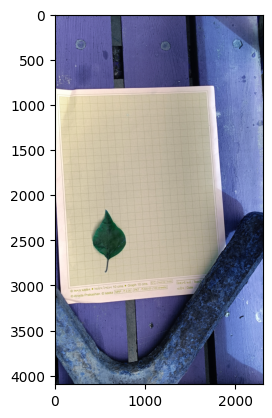

In [2]:
local_path = 'Collected Leaf data/Botany Collection/Graph Background/IMG20240213091245.jpg'
cur_img = cv.imread(local_path)
plt.imshow(cur_img)

In [3]:
cur_img_gray = cv.cvtColor(cv.GaussianBlur(cur_img, (7,7), 0), cv.COLOR_BGR2GRAY)

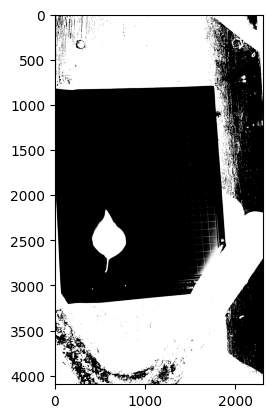

In [4]:
cur_thresh = cv.threshold(cur_img_gray, np.mean(cur_img_gray), 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)[1]
plt.imshow(cur_thresh, cmap='Greys_r')
plt.show()

In [5]:
edges = cv.dilate(cv.Canny(cur_thresh, 0, 255), None)
# masked = []
# segmented = []

# plt.imshow(edges)
# plt.show()

cnt = cv.findContours(edges, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[-2]
cnt = [x for x in cnt if cv.contourArea(x) > 120000 and cv.contourArea(x) < 130000]
mask = np.zeros_like(edges, np.uint8)

print('cnt:', len(cnt))
print('img:', edges.dtype, edges.shape)
print('cur_img:', cur_img.dtype, cur_img.shape)
print('mask:', mask.dtype, mask.shape)
print('cur_thresh:', cur_thresh.dtype, cur_thresh.shape)

masked = cv.drawContours(mask, cnt,-1, 255, -1)
dst = cv.bitwise_and(cur_img, cur_img, mask=mask)
segmented = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

cnt: 1
img: uint8 (4096, 2304)
cur_img: uint8 (4096, 2304, 3)
mask: uint8 (4096, 2304)
cur_thresh: uint8 (4096, 2304)


In [6]:
for x in cnt:
    print(cv.contourArea(x))

125546.5


masked: uint8 (4096, 2304) 



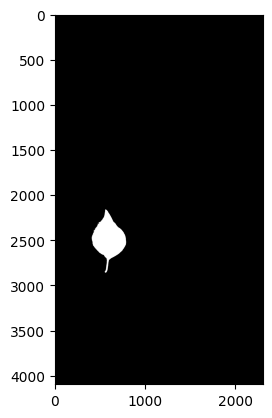

In [7]:
print('masked:', masked.dtype, masked.shape, '\n')

plt.imshow(masked, cmap='Greys_r')
plt.show()

segmented: uint8 (4096, 2304, 3) 



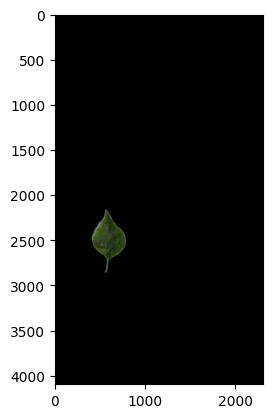

In [8]:
print('segmented:', segmented.dtype, segmented.shape, '\n')

plt.imshow(segmented, cmap='BrBG')
plt.show()

# NEXT TASK

1) Train a model on the black background images and also pre-process them along with segmentation.
2) Create a prog that takes natural images, then creates multiple combinations with varying parameters of thresholding func, then puts the processed image into the model and gets the accuracy for any single class.
3) Now train that model with that new image.

=============================================================================================================================

# EXPERIMENTS

### New Species
#####  (sp: signature plant) (g: Genus)

1) Ivora Coccinea
2) Bougainvillea glabra
3) karmda
4) Tacoma stans
5) (Genus) wedelia,(sp) trilobata
6) annona squamasa
7) lantana camera
8) aegle marmelos
9) pedilanthus tithumalodes
10) vitex negundo
11) dracaena reflexa
12) ipomea carica
13) cocculus hirsutus
14) dracaena angustifolia
15) nerium oleander
16) aehyranthes aspera
17) abution indieron
18) aristolochia [htoralis] pending_
19) tetraploid mulberry
20) euphorbia tithymaloides
21) acalypha wilkesiana
22) Murraya paniculata
23) pelargonium sp.
24) lawsonia lnermis
25) (genus) euphorbia, (sp) milii
26) polyseias scutellaria
27) justicia adhatoda
28) limonia acidissima (wood apple)
29) dracena reflexa  <--- This is repeated in the new species itself
30) polyscias fruticoss
31) kalanchoe brasilliensis
32) thunbergia fragrenf
33) jasminum sambac
34) Madagascar rubba vine cryptosteria madagasriensis
35) acter psudocreth
36) myoporum Laetum (sp: signature plant)
37) Epipremnun aureum 

## Rectifying if any species are redundant. And creating a new json file New_Species.json

In [27]:
# Function to process the new species and match them with old species
def process_new_species(old_species, new_species):
    new_species_list = new_species.split('\n')
    for word in new_species_list:
        for key, value in old_species.items():
            if word in value:
                new_species_list.remove(word)
                break
    return new_species_list

# Function to append new species to old species
def append_new_species(old_species, new_species_list):
    new_key = len(old_species)
    for species in new_species_list:
        old_species[str(new_key)] = ['', species]
        new_key += 1

# Read old species from Species.json
old_species = mld.readSpeciesJsonFile()

# New species string
new_species_string = """Ixora coccinea
Bougainvillea glabra
karmda
Tacoma stans
(Genus) wedelia,(sp) trilobata
annona squamasa
lantana camera
aegle marmelos
pedilanthus tithumalodes
vitex negundo
dracaena reflexa
ipomea carica
cocculus hirsutus
dracaena angustifolia
nerium oleander
aehyranthes aspera
abution indieron
aristolochia [htoralis] pending_
tetraploid mulberry
euphorbia tithymaloides
acalypha wilkesiana
Murraya paniculata
pelargonium sp.
lawsonia lnermis
(genus) euphorbia, (sp) milii
polyseias scutellaria
justicia adhatoda
limonia acidissima (wood apple)
polyscias fruticoss
kalanchoe brasilliensis
thunbergia fragrenf
jasminum sambac
Madagascar rubba vine cryptosteria madagasriensis
acter psudocreth
myoporum Laetum (sp: signature plant)
Epipremnun aureum"""

# Process new species
new_species_list = process_new_species(old_species, new_species_string)

# Append new species to old species
append_new_species(old_species, new_species_list)

# Write combined species to New_Species.json
with open("New_Species.json", 'w') as file:
    json.dump(old_species, file, indent=4)


### Transferring Species from New_Species_with_CommonNames.json to Species.json

In [3]:
def capitalize_all_words(string):
    return string.title()

with open('New_Species_with_CommonNames.json', 'r') as file:
    new_data = dict(json.load(file))
    for key, value in new_data.items():
        value[0], value[1] = capitalize_all_words(value[0]), capitalize_all_words(value[1])
        mld.addNewSpecies(value)

### Testing to get all images of each species from csv. One image of each species.

In [6]:
csv_data = pd.read_csv('Leaf_Data_Mapped.csv')
csv_data

,Image,Common name,Scientific name,Class number
0,IMG20231004154634.jpg,Peepla,Ficus religiosa,0
1,IMG20231004154651.jpg,Peepla,Ficus religiosa,0
2,IMG20231004154748.jpg,Peepla,Ficus religiosa,0
3,IMG20231004154809.jpg,Peepla,Ficus religiosa,0
4,IMG20231004154917.jpg,Peepla,Ficus religiosa,0
...,...,...,...,...
92,IMG20231004172618.jpg,Pipal,Ficus amplissima,19
93,IMG20231004172657.jpg,Pipal,Ficus amplissima,19
94,IMG20231004172723.jpg,Pipal,Ficus amplissima,19
95,IMG20231004172803.jpg,Pipal,Ficus amplissima,19


In [13]:
tmp = dict(zip(range(5), "hello"))
list(tmp.items())[:3]

[(0, 'h'), (1, 'e'), (2, 'l')]

=============================================================================================================================

## Mapping completed and stored in Leaf_Data_Mapped.csv file

-----------------------------------------------------------------------------------------------------------------------------

## Mapping completed of New Species data with Graph Background images

-----------------------------------------------------------------------------------------------------------------------------

In [1]:
import os
import shutil
import pandas as pd
from PIL import Image

def resize_image(image_path, output_size=(256, 256)):
    image = Image.open(image_path)
    image = image.resize(output_size, Image.ANTIALIAS)
    return image

def process_images(csv_file, folder_path1, folder_path2, output_folder):
    # Load CSV file
    df = pd.read_csv(csv_file)

    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Keep track of stored scientific names
    stored_names = set()

    # Iterate through each row in the dataframe
    for index, row in df.iterrows():
        image_name = row['image']
        scientific_name = row['scientific_name']
        class_number = row['class_number']

        # Check if the scientific name has been stored before
        if scientific_name in stored_names:
            continue

        # Check if the image is in folder_path1 or folder_path2
        if os.path.exists(os.path.join(folder_path1, image_name)):
            source_path = os.path.join(folder_path1, image_name)
        elif os.path.exists(os.path.join(folder_path2, image_name)):
            source_path = os.path.join(folder_path2, image_name)
        else:
            print(f"Image '{image_name}' not found in any specified folder.")
            continue

        # Define destination path and rename image with scientific name
        destination_path = os.path.join(output_folder, f"{class_number}_{scientific_name}.jpg")

        # Resize the image to 256x256
        resized_image = resize_image(source_path, output_size=(256, 256))

        # Save the resized image to the output folder
        resized_image.save(destination_path)

        # Copy the image to the output folder
        # shutil.copy(source_path, destination_path)

        # Add the scientific name to the set of stored names
        stored_names.add(scientific_name)

if __name__ == "__main__":
    csv_file = "Leaf_Data_Mapped.csv"  # Provide path to your CSV file
    folder_path1 = "Collected Leaf data/Botany Collection/Natural/"  # Provide path to the first folder containing images
    folder_path2 = "Collected Leaf data/Botany Collection/Graph Background/"  # Provide path to the second folder containing images
    output_folder = "Temp_Leaf_Storage/"  # Provide path to the output folder

    process_images(csv_file, folder_path1, folder_path2, output_folder)

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_8684\3629996643.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(output_size, Image.ANTIALIAS)


In [ ]:
import os
import shutil
import pandas as pd

def rename_and_store_images(csv_file, image_folder, output_folder):
    # Load CSV file
    df = pd.read_csv(csv_file)

    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through each row in the dataframe
    for index, row in df.iterrows():
        image_name = row['image']
        class_number = row['class_number']

        # Check if the image exists in the specified folder
        if os.path.exists(os.path.join(image_folder, image_name)):
            # Construct new file name
            folder_name = image_folder.split('/')[::-1][0]
            new_name = f"{folder_name}_{index}_{class_number}.jpg"
            
            # Copy and rename the image to the output folder
            shutil.copy(os.path.join(image_folder, image_name), os.path.join(output_folder, new_name))
        else:
            print(f"Image '{image_name}' not found in the specified folder.")
            # pass

if __name__ == "__main__":
    csv_file = "Leaf_Data_Mapped.csv"  # Provide path to your CSV file
    image_folder = "Collected Leaf data/Botany Collection/Graph Background"  # Provide path to the folder containing images
    output_folder = "Mapped_Renamed_Images"  # Provide path to the output folder

    rename_and_store_images(csv_file, image_folder, output_folder)

In [11]:
def write_numbers_to_file(filename):
    with open(filename, 'w') as file:
        for i in range(54):  # Range from 0 to 53
            file.write(str(i) + '\n')  # Write the number followed by a newline character

if __name__ == "__main__":
    filename = "Class_Numbers.txt"  # Provide the desired filename here

    write_numbers_to_file(filename)
